# Volume 4: Introduction to Initial and Boundary Value Problems

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Problem 1
Use `solve_ivp` to solve for $y$ in the equation $y'' - y = sin(t)$ with initial conditions $y(0)= -\frac{1}{2}$, $y'(0) = 0$ and plot your solution on the interval $[0,5]$. Compare this to the analytic solution $y=-\frac{1}{2}(e^{-t}+sin(t))$. 

Note: Using max_step = 0.1 with give you a smoother graph here

<Figure size 1200x480 with 0 Axes>

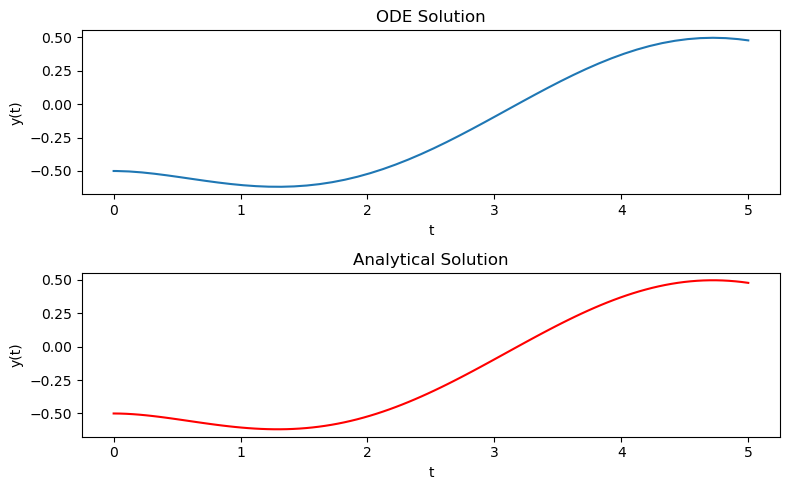

In [11]:
plt.figure(figsize=(15,6),dpi=80)

# element 1: the ODE function
def ode(t, y):
    '''defines the ode system'''
    return np.array([y[1],np.sin(t)+y[0]])

# element 2: the time domain
t_span = (0,5)

# element 3: the initial conditions
y0 = np.array([-0.5, 0])

# solve the system
# max_step is an optional parameter that controls maximum step size and
# a smaller value will result in a smoother graph
sol = solve_ivp(ode, t_span, y0, max_step=0.1)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))  # 1 row, 2 columns

# Plot ODE Solution
ax1.plot(sol.t, sol.y[0])
ax1.set_xlabel('t')
ax1.set_ylabel('y(t)')
ax1.set_title('ODE Solution')

# Plot analytical solution
x = np.linspace(0, 5, 100)
f = lambda t: -.5*(np.exp(-t) + np.sin(t))
ax2.plot(x, f(x), color='red')
ax2.set_xlabel('t')
ax2.set_ylabel('y(t)')
ax2.set_title('Analytical Solution')

# Show the plots
plt.tight_layout()
plt.show()

### Problem 2

Use `solve_bvp` to solve for $y$ in the equation $y'+y''=-\frac{1}{4}e^{-0.5t}+\sin(t)-\cos(t)$ with boundary conditions $y(0)=6$ and $y'(5)=-0.324705$ and plot your solution on the interval $[0,5]$. Use an initial guess of all ones. Compare this to the analytic solution $y =e^{-0.5t}-\sin(t)+5$. 

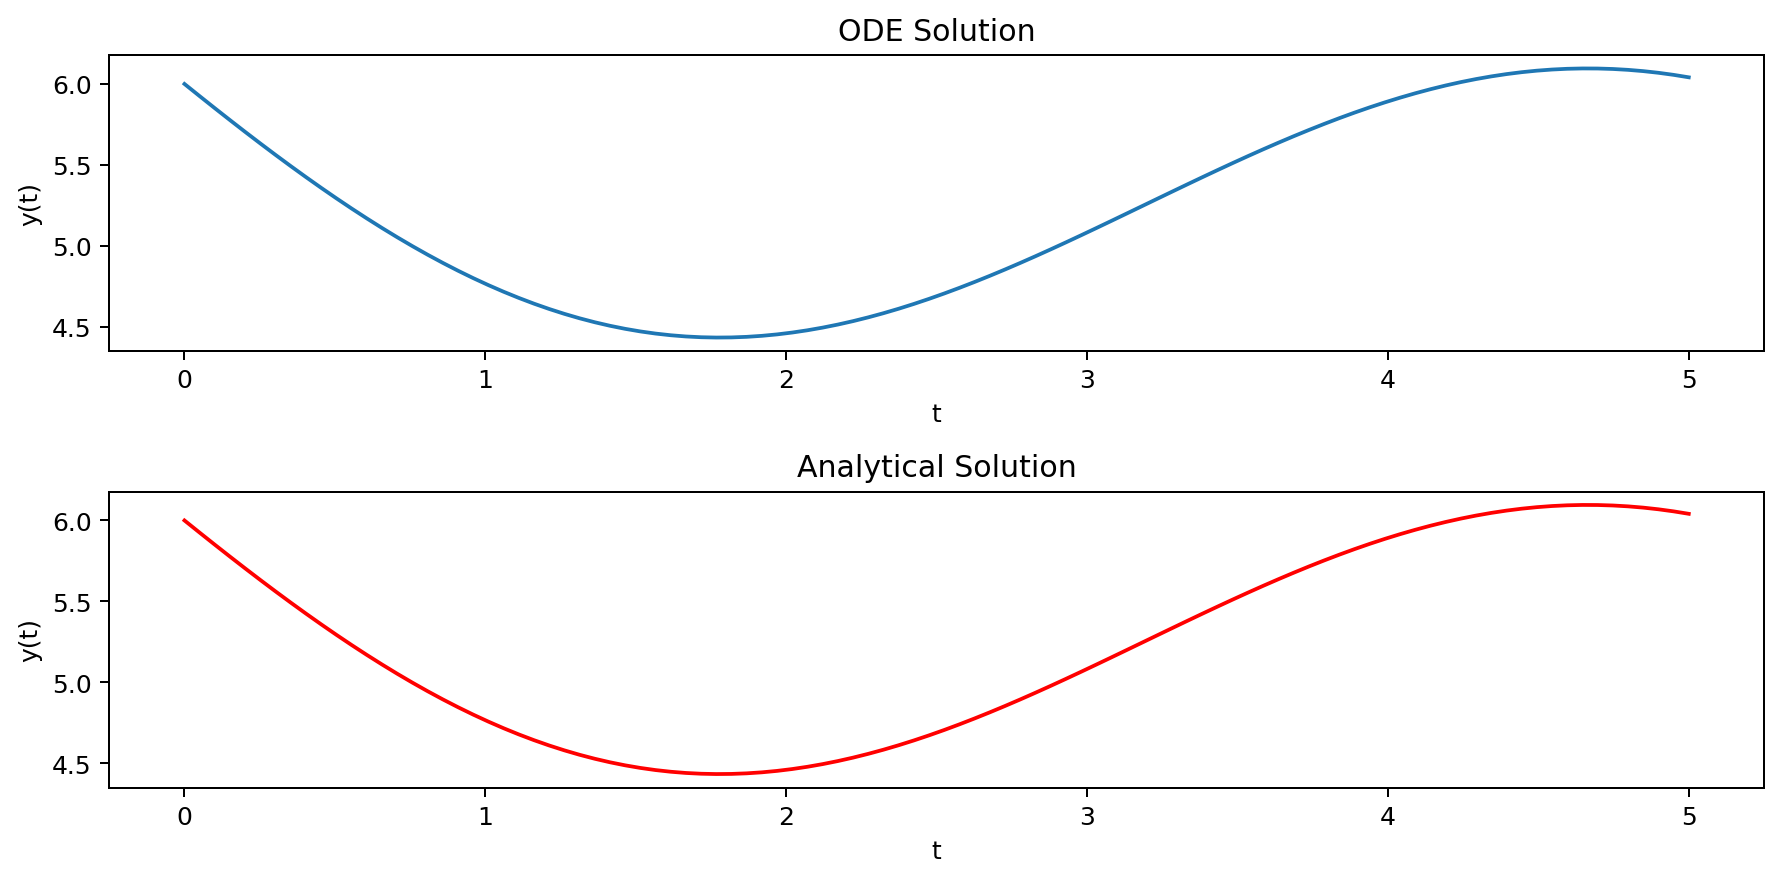

In [16]:
# element 1: the ODE function
def ode(t,y):
    ''' define the ode system '''
    return np.array([y[1], -.25*np.exp(-.5*t) + np.sin(t) - np.cos(t) - y[1]])

# element 2: the boundary condition function
def bc(ya,yb):
    ''' define the boundary conditions '''
    # ya are the initial values
    # yb are the final values
    # each entry of the return array will be set to zero
    return np.array([ya[0] - 6, yb[1] + 0.324705])

# element 3: the time domain.
t_steps = 100
t = np.linspace(0,5,t_steps)

# element 4: the initial guess.
y0 = np.ones((2,t_steps))

# Solve the system.
sol = solve_bvp(ode, bc, t, y0)

# Plot the system.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), dpi=180)  # 1 row, 2 columns

# Plot ODE Solution
ax1.plot(sol.x, sol.y[0])
ax1.set_xlabel('t')
ax1.set_ylabel('y(t)')
ax1.set_title('ODE Solution')

# Plot analytical solution
x = np.linspace(0, 5, 100)
f = lambda t: (np.exp(-0.5*t) - np.sin(t) + 5)
ax2.plot(x, f(x), color='red')
ax2.set_xlabel('t')
ax2.set_ylabel('y(t)')
ax2.set_title('Analytical Solution')

# Show the plots
plt.tight_layout()
plt.show()

### Problem 3

Use `solve_bvp` to solve for $y$ in the equation $y''=(1-y')*10y$ with boundary conditions $y(0)=-1$ and $y(1)=\frac{3}{2}$ and plot your solution on the interval $[0,1]$. Use an initial guess of 10. Compare this to the the same solution using an initial guess of 9.99. 

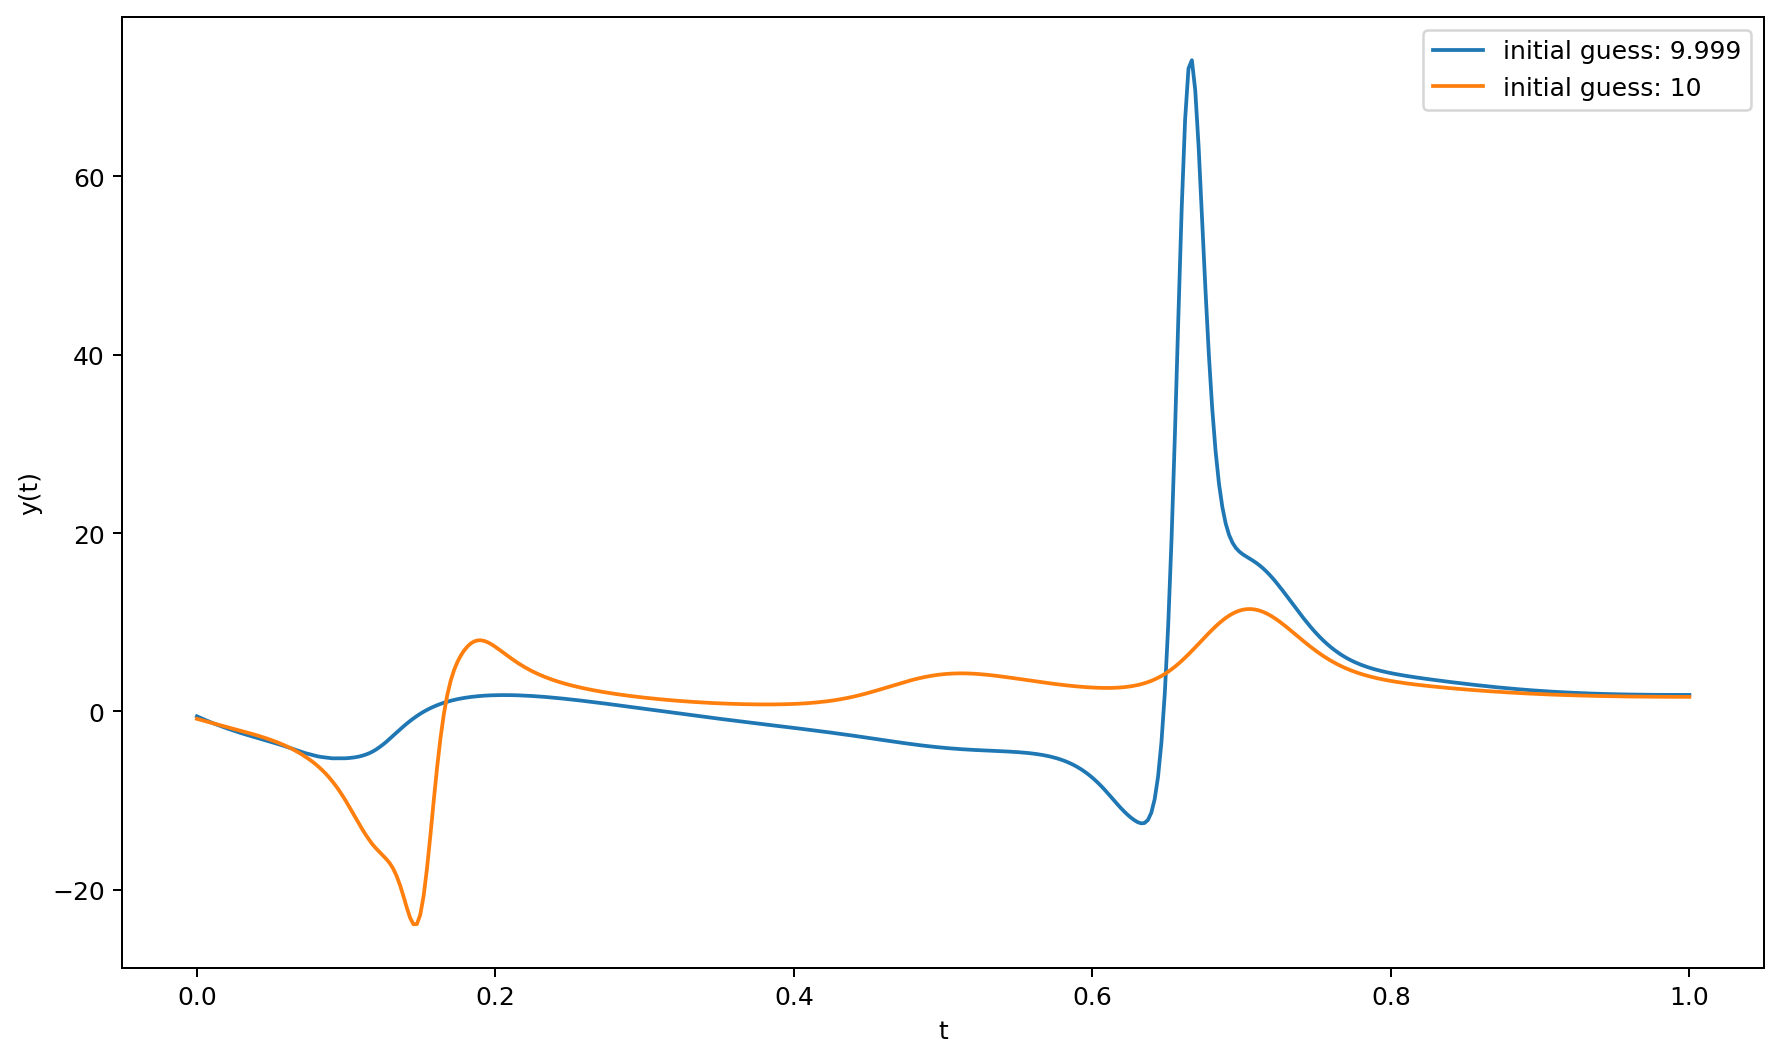

In [21]:
plt.figure(figsize=(10,6),dpi=180)

# element 1: the ODE function
def ode(t,y):
    ''' define the ode system '''
    return np.array([y[1], 10*y[0]*(1-y[1])])

# element 2: the boundary condition function
def bc(ya,yb):
    ''' define the boundary conditions '''
    # ya are the initial values
    # yb are the final values
    # each entry of the return array will be set to zero
    return np.array([ya[0] + 1, yb[0] - 3/2])

# element 3: the time domain.
t_steps = 50
t = np.linspace(0,1,t_steps)

# element 4: the initial guess.
y0 = np.full((2,t_steps), 10)
y1 = np.full((2,t_steps), 9.99)

# Solve the system.
sol = solve_bvp(ode, bc, t, y0)
sol1 = solve_bvp(ode, bc, t, y1)

# Plot the system.
plt.plot(sol1.x, sol1.y[0], label='initial guess: 9.999')
plt.plot(sol.x, sol.y[0], label='initial guess: 10')
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')

# Show the plots
plt.tight_layout()
plt.show()

### Problem 4
Use `solve_ivp` to solve the Four-Wing Attractor as described in equations (1.2), (1.3), and (1.4) where $a=0.2$, $b = 0.01$, and $c = -0.4$. Try this with 3 different initial values and plot (in three dimensions) the 3 corresponding graphs.

<Figure size 1800x1080 with 0 Axes>

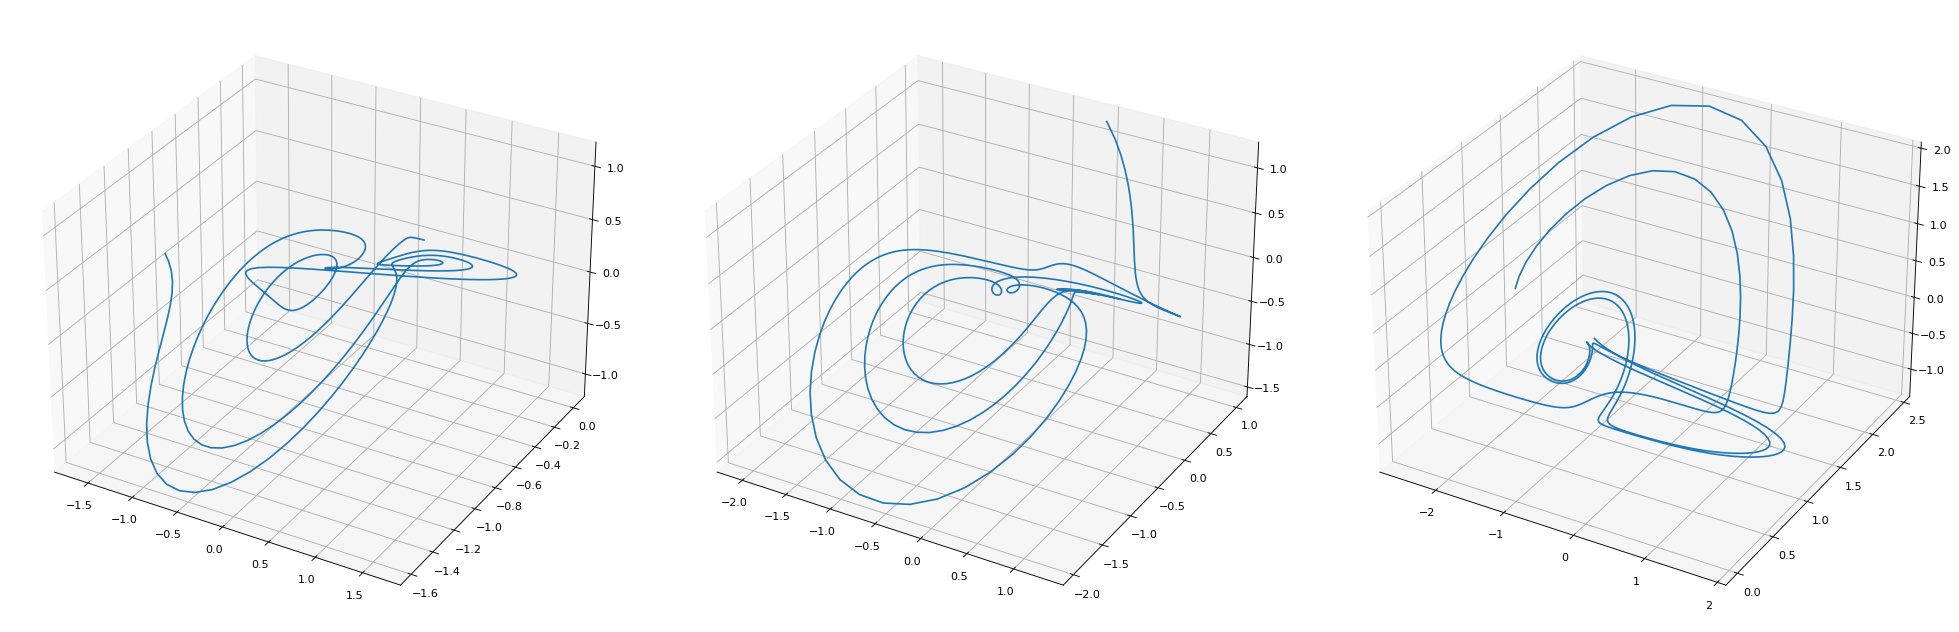

In [28]:
plt.figure(figsize=(10,6),dpi=180)

# element 1: the ODE function
def ode(t,V):
    ''' define the ode system '''
    x, y, z = V
    return np.array([0.2*x + y*z, 0.01*x - 0.4*y - x*z, -z - x*y])

# element 3: the time domain.
t_steps = 400
t = (0, 100)

# element 4: the initial guess.
y0 = np.array([-1.5, -1, 0.33])
y1 = np.array([0, 1, 1.2241])
y2 = np.array([-2, 0.91991, 0.4143])

# Solve the system.
sol = solve_ivp(ode, t, y0, max_step=0.1)
sol1 = solve_ivp(ode, t, y1, max_step=0.1)
sol2 = solve_ivp(ode, t, y2, max_step=0.1)

fig = plt.figure(figsize=(25,8),dpi=80)
ax = fig.add_subplot(1,3,1, projection='3d')
ax.plot3D(sol.y[0], sol.y[1], sol.y[2], label=f'y = {y0}')

ax = fig.add_subplot(1,3,2, projection='3d')
ax.plot3D(sol1.y[0], sol1.y[1], sol1.y[2], label=f'y = {y1}')

ax = fig.add_subplot(1,3,3, projection='3d')
ax.plot3D(sol2.y[0], sol2.y[1], sol2.y[2], label=f'y = {y2}')
# plt.legend()
# plt.xlabel('t')
# plt.ylabel('y(t)')

# Show the plots
plt.tight_layout()
plt.show()

## Problem 5

Write a function that uses `solve_bvp` to find $\psi$ and $E$ that are solutions to the Schroedinger equation for the potential $U(x)=x^2$ and with boundary conditions $\psi(-1)=\psi(1)=0, \psi'(-1)=1$.
By varying your initial guess for $E$, use your function to find solutions for several different values of $E$, and plot them together.

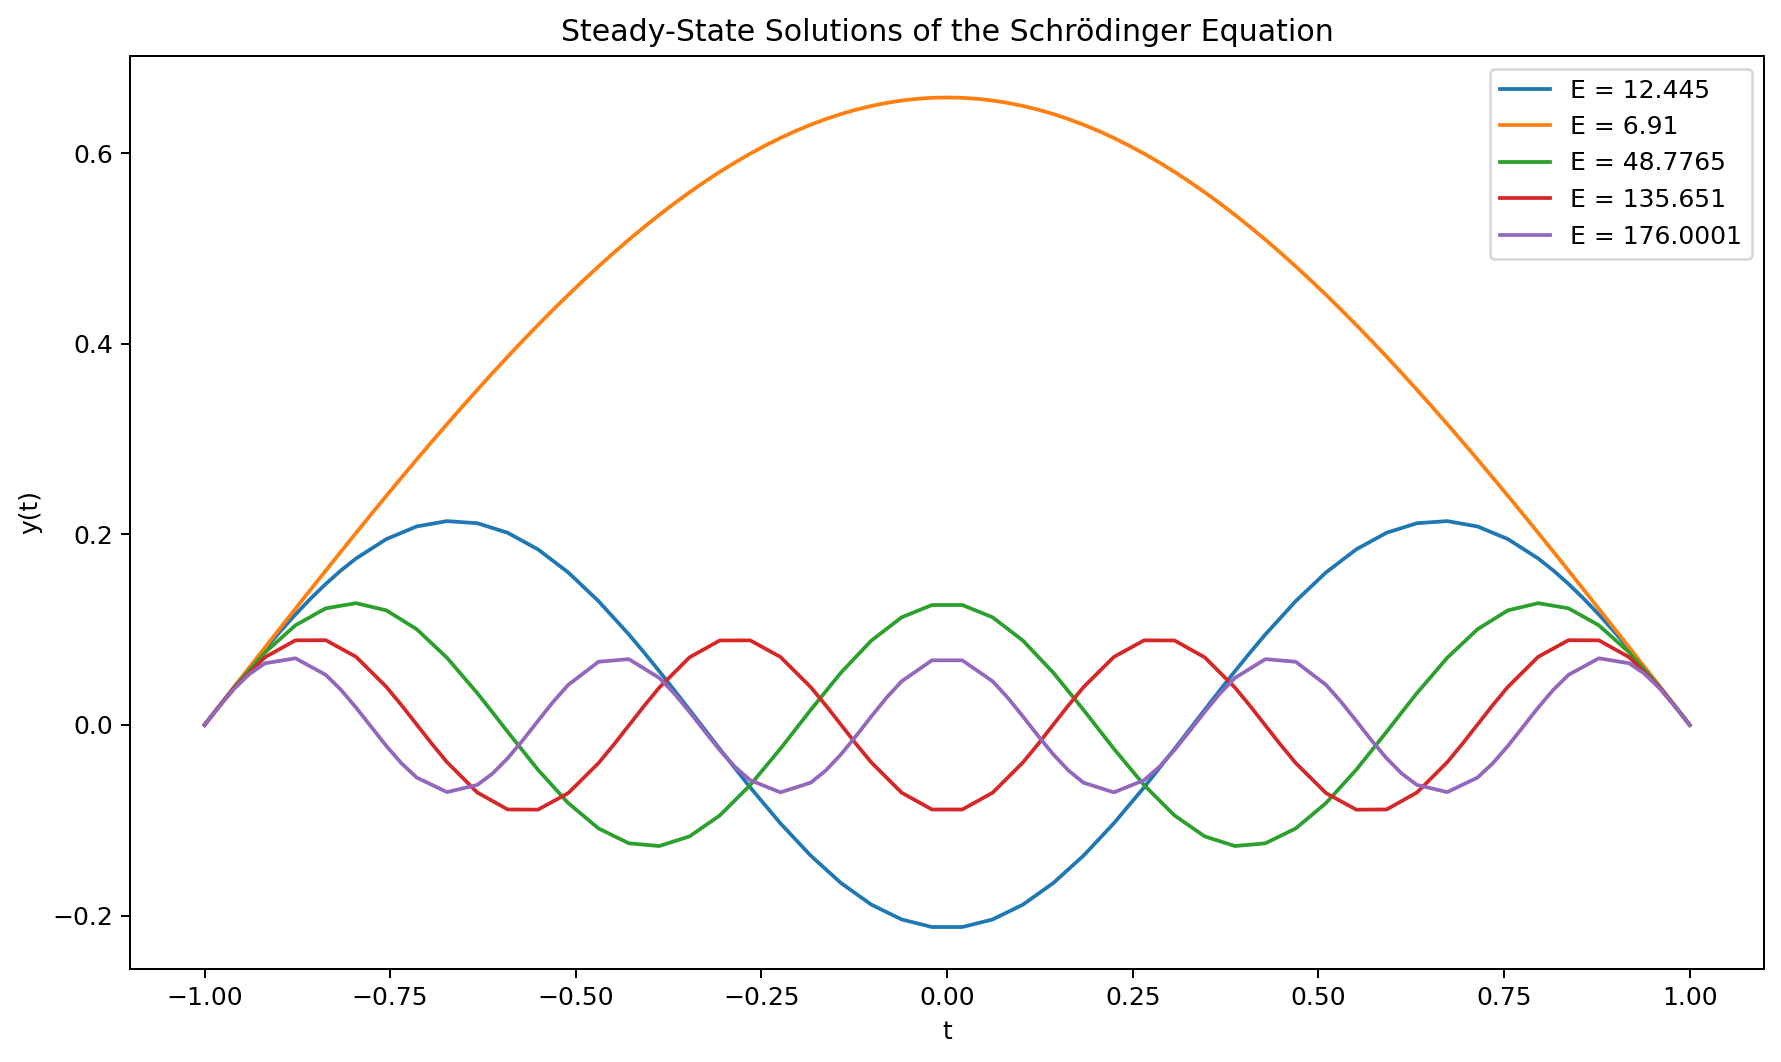

In [31]:
plt.figure(figsize=(10,6),dpi=180)

# element 1: the ODE function
def ode(t, y, p):
    ''' define the ode system '''
    return np.array([y[1],
                     t**2 * y[0] - p*y[0]])

# element 2: the boundary condition function
def bc(ya, yb, p):
    ''' define the boundary conditions '''
    # ya are the initial values
    # yb are the final values
    # each entry of the return array will be set to zero
    return np.array([ya[0] - 0,
                     yb[0] - 0,
                     ya[1] - 1])

# element 3: the time domain.
t_steps = 50
t = np.linspace(-1, 1, t_steps)

# element 4: the initial guess.
y0 = np.full((2,t_steps), 1)

# Solve the system.
for E in [12.445, 6.91, 48.7765, 135.651, 176.0001]:
    sol = solve_bvp(ode, bc, t, y0, p=[E])
    plt.plot(sol.x, sol.y[0], label=f'E = {E}')

# Plot the system.
plt.title('Steady-State Solutions of the Schrödinger Equation')
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')

# Show the plots
plt.tight_layout()
plt.show()